#  **1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy**

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [137]:
# import dataset 
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [138]:
# make the dataFrame 
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data['target'] = iris.target
data.head()
data.shape

(150, 5)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [140]:
# Separate Independet and dependet Features
X = data.drop('target',axis=1)
y = data['target']
print(f"X : {X.shape}\ny : {y.shape}")

X : (150, 4)
y : (150,)


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\
    \ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train : (105, 4)
X_test : (45, 4)    
y_train : (105,)
y_test : (45,)


In [142]:
from sklearn.tree import DecisionTreeClassifier
cls_01 = DecisionTreeClassifier()
cls_01

DecisionTreeClassifier()

In [143]:
param = {
    "criterion":["gini", "entropy", "log_loss"],
    'splitter' : ['best', 'random'],
    'max_depth':[5,7,9,10,15,100]
}

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid = GridSearchCV(cls_01,param_grid=param,cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 9, 10, 15, 100],
                         'splitter': ['best', 'random']},
             verbose=3)

In [145]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, splitter=best;, score=0.952 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, splitter=best;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, splitter=best;, score=0.952 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, splitter=best;, score=0.857 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, splitter=random;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, splitter=random;, score=0.810 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, splitter=random;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, splitter=random;, score=0.905 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, splitter=random;, score=0.857 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 9, 10, 15, 100],
                         'splitter': ['best', 'random']},
             verbose=3)

In [146]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [147]:
model_01 = grid.best_estimator_
y_pred = model_01.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



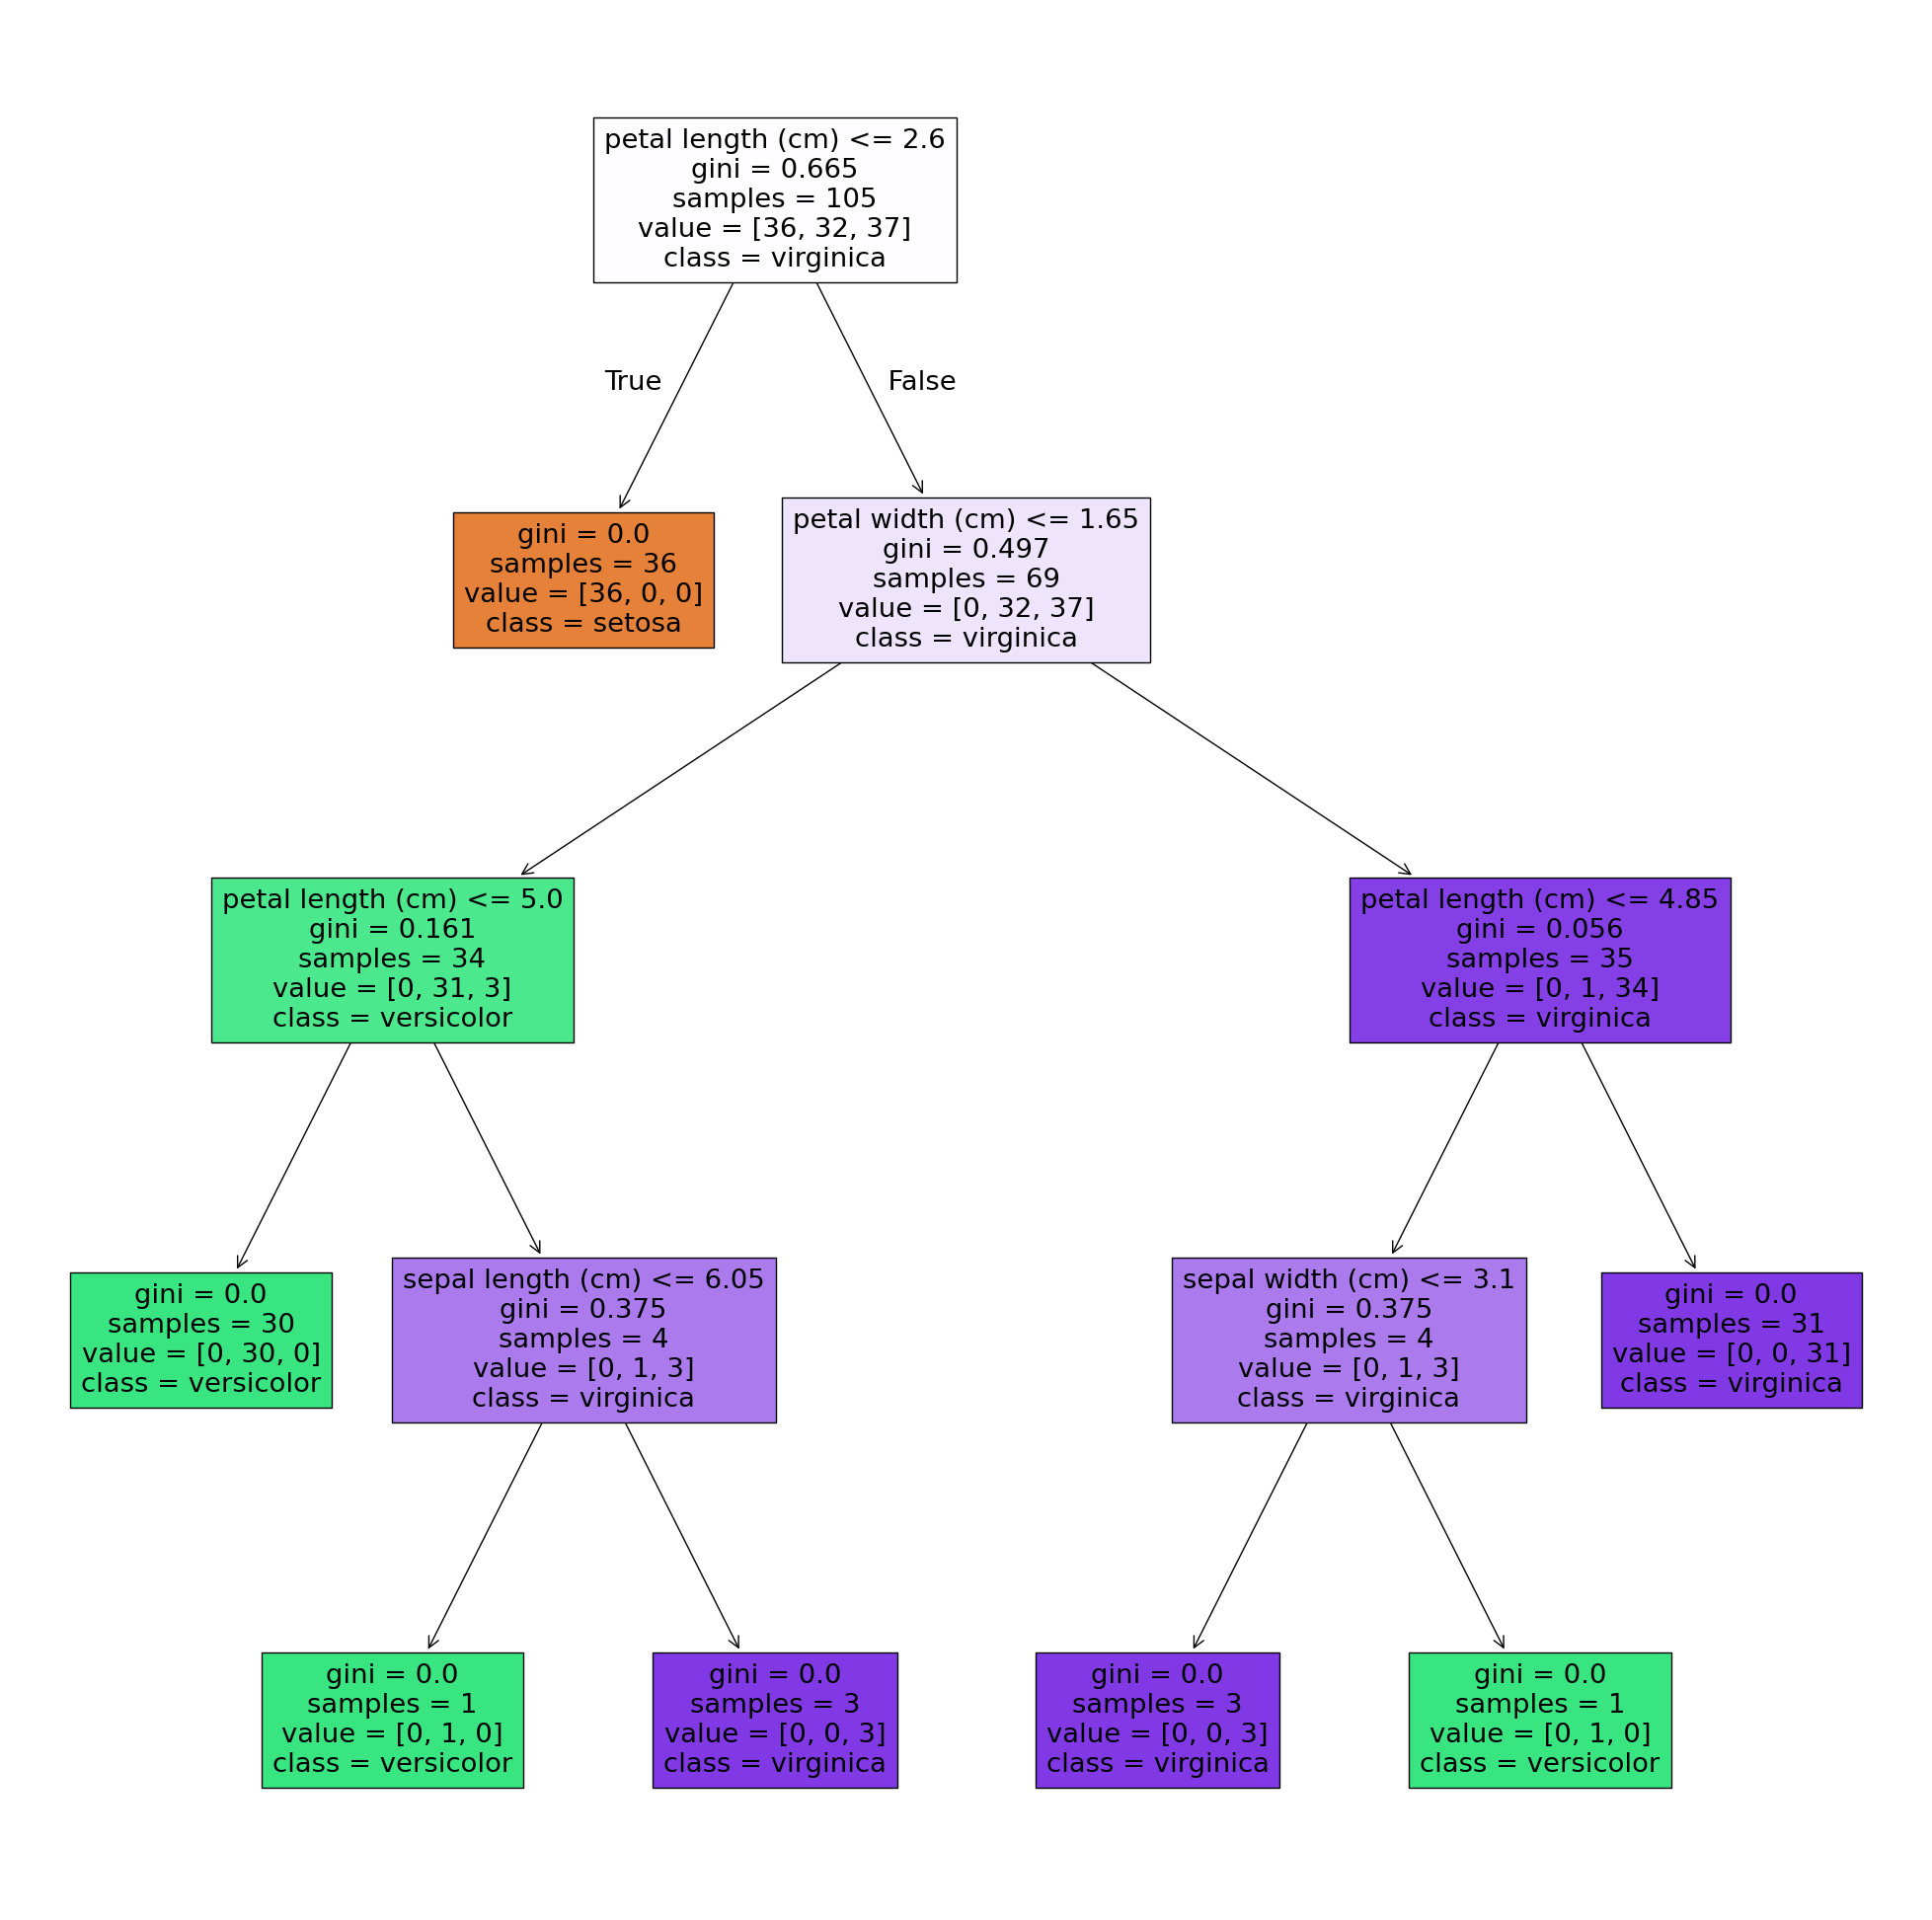

In [148]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(model_01, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# **2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances**

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [151]:
# print(sns.get_dataset_names())
iris = sns.load_dataset('iris')
# iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [152]:
# iris['species'].unique()
# iris['species'] = iris['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [153]:
# Split The Independent and Dependent Variable
X = iris.drop('species',axis = 1)
y = iris['species']

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 1)
print(f"X_train Shape : {X_train.shape} \nX_test Shape {X_test.shape}")
print(f"y_train Shape : {y_train.shape} \ny_test Shape {y_test.shape}")

X_train Shape : (112, 4) 
X_test Shape (38, 4)
y_train Shape : (112,) 
y_test Shape (38,)


In [155]:
from sklearn.tree import DecisionTreeClassifier
model_02 = DecisionTreeClassifier(criterion="gini")
model_02

DecisionTreeClassifier()

In [156]:
model_02.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
y_pred_02 = model_02.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_02))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



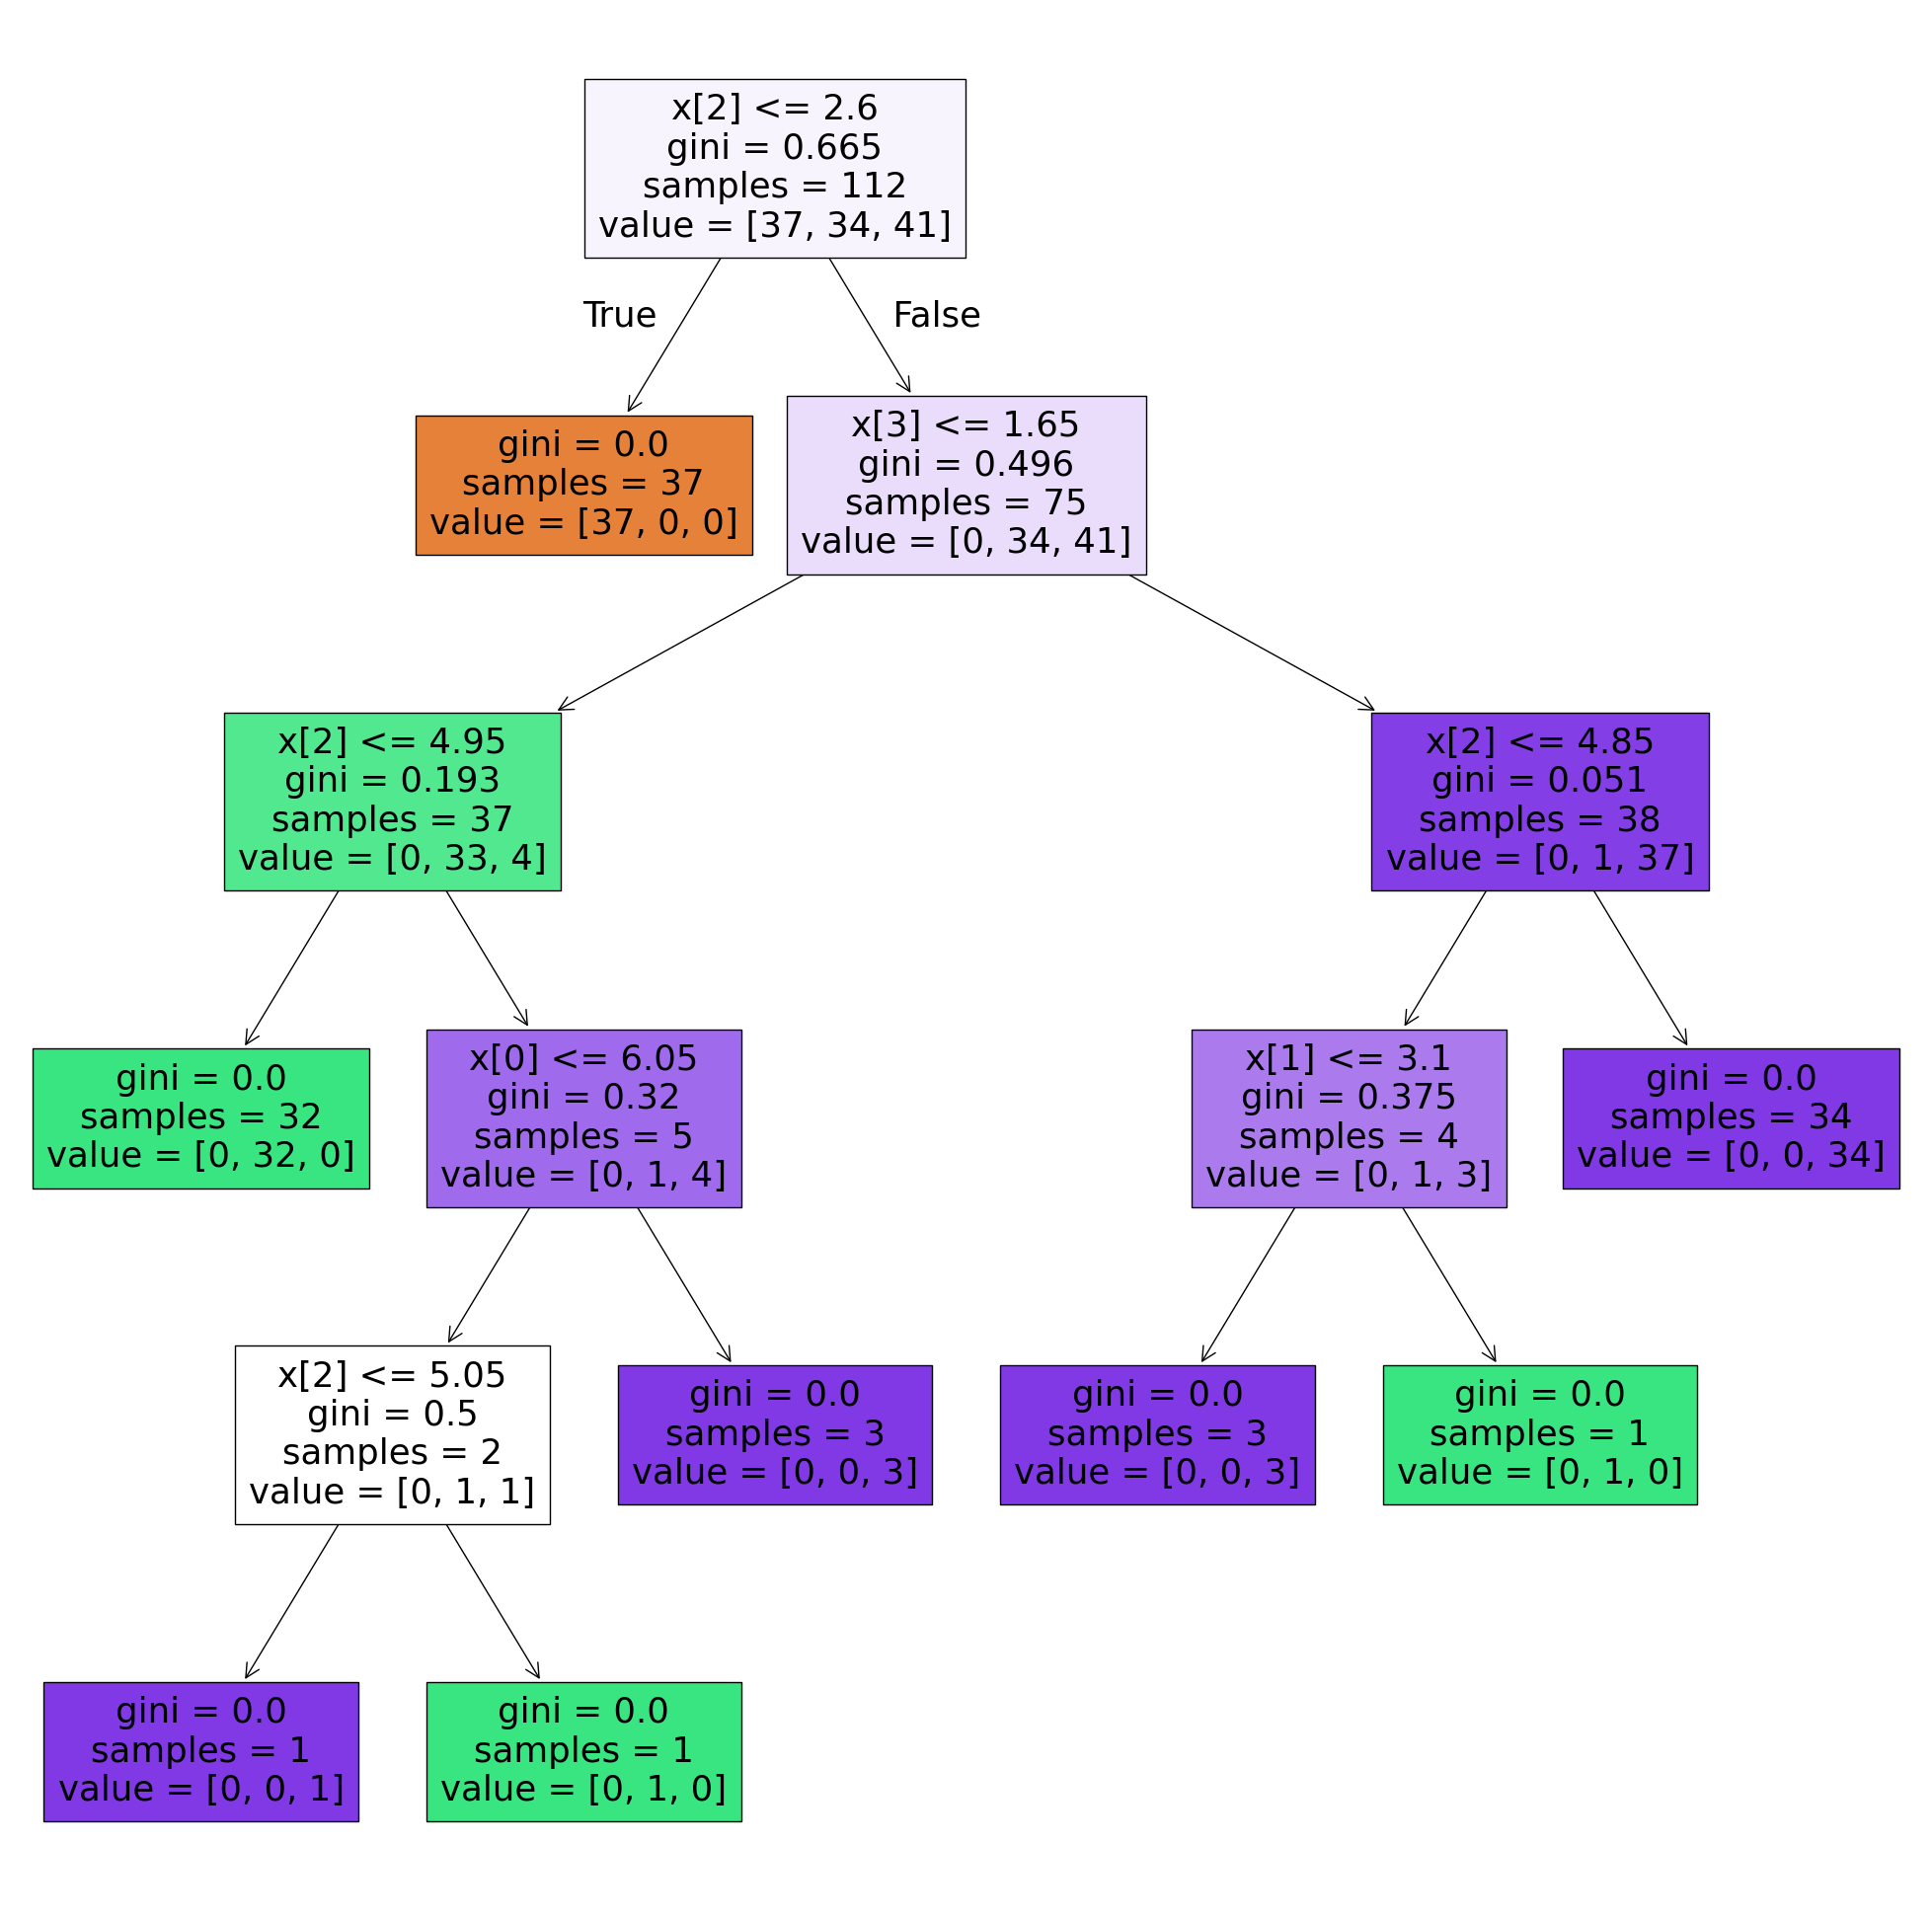

In [158]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(model_02, filled=True)
plt.show()

# **3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy**

In [160]:
from sklearn.tree import DecisionTreeClassifier
model_03 = DecisionTreeClassifier(criterion="entropy")
model_03

DecisionTreeClassifier(criterion='entropy')

In [161]:
model_03.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [162]:
y_pred_03 = model_03.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_03))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



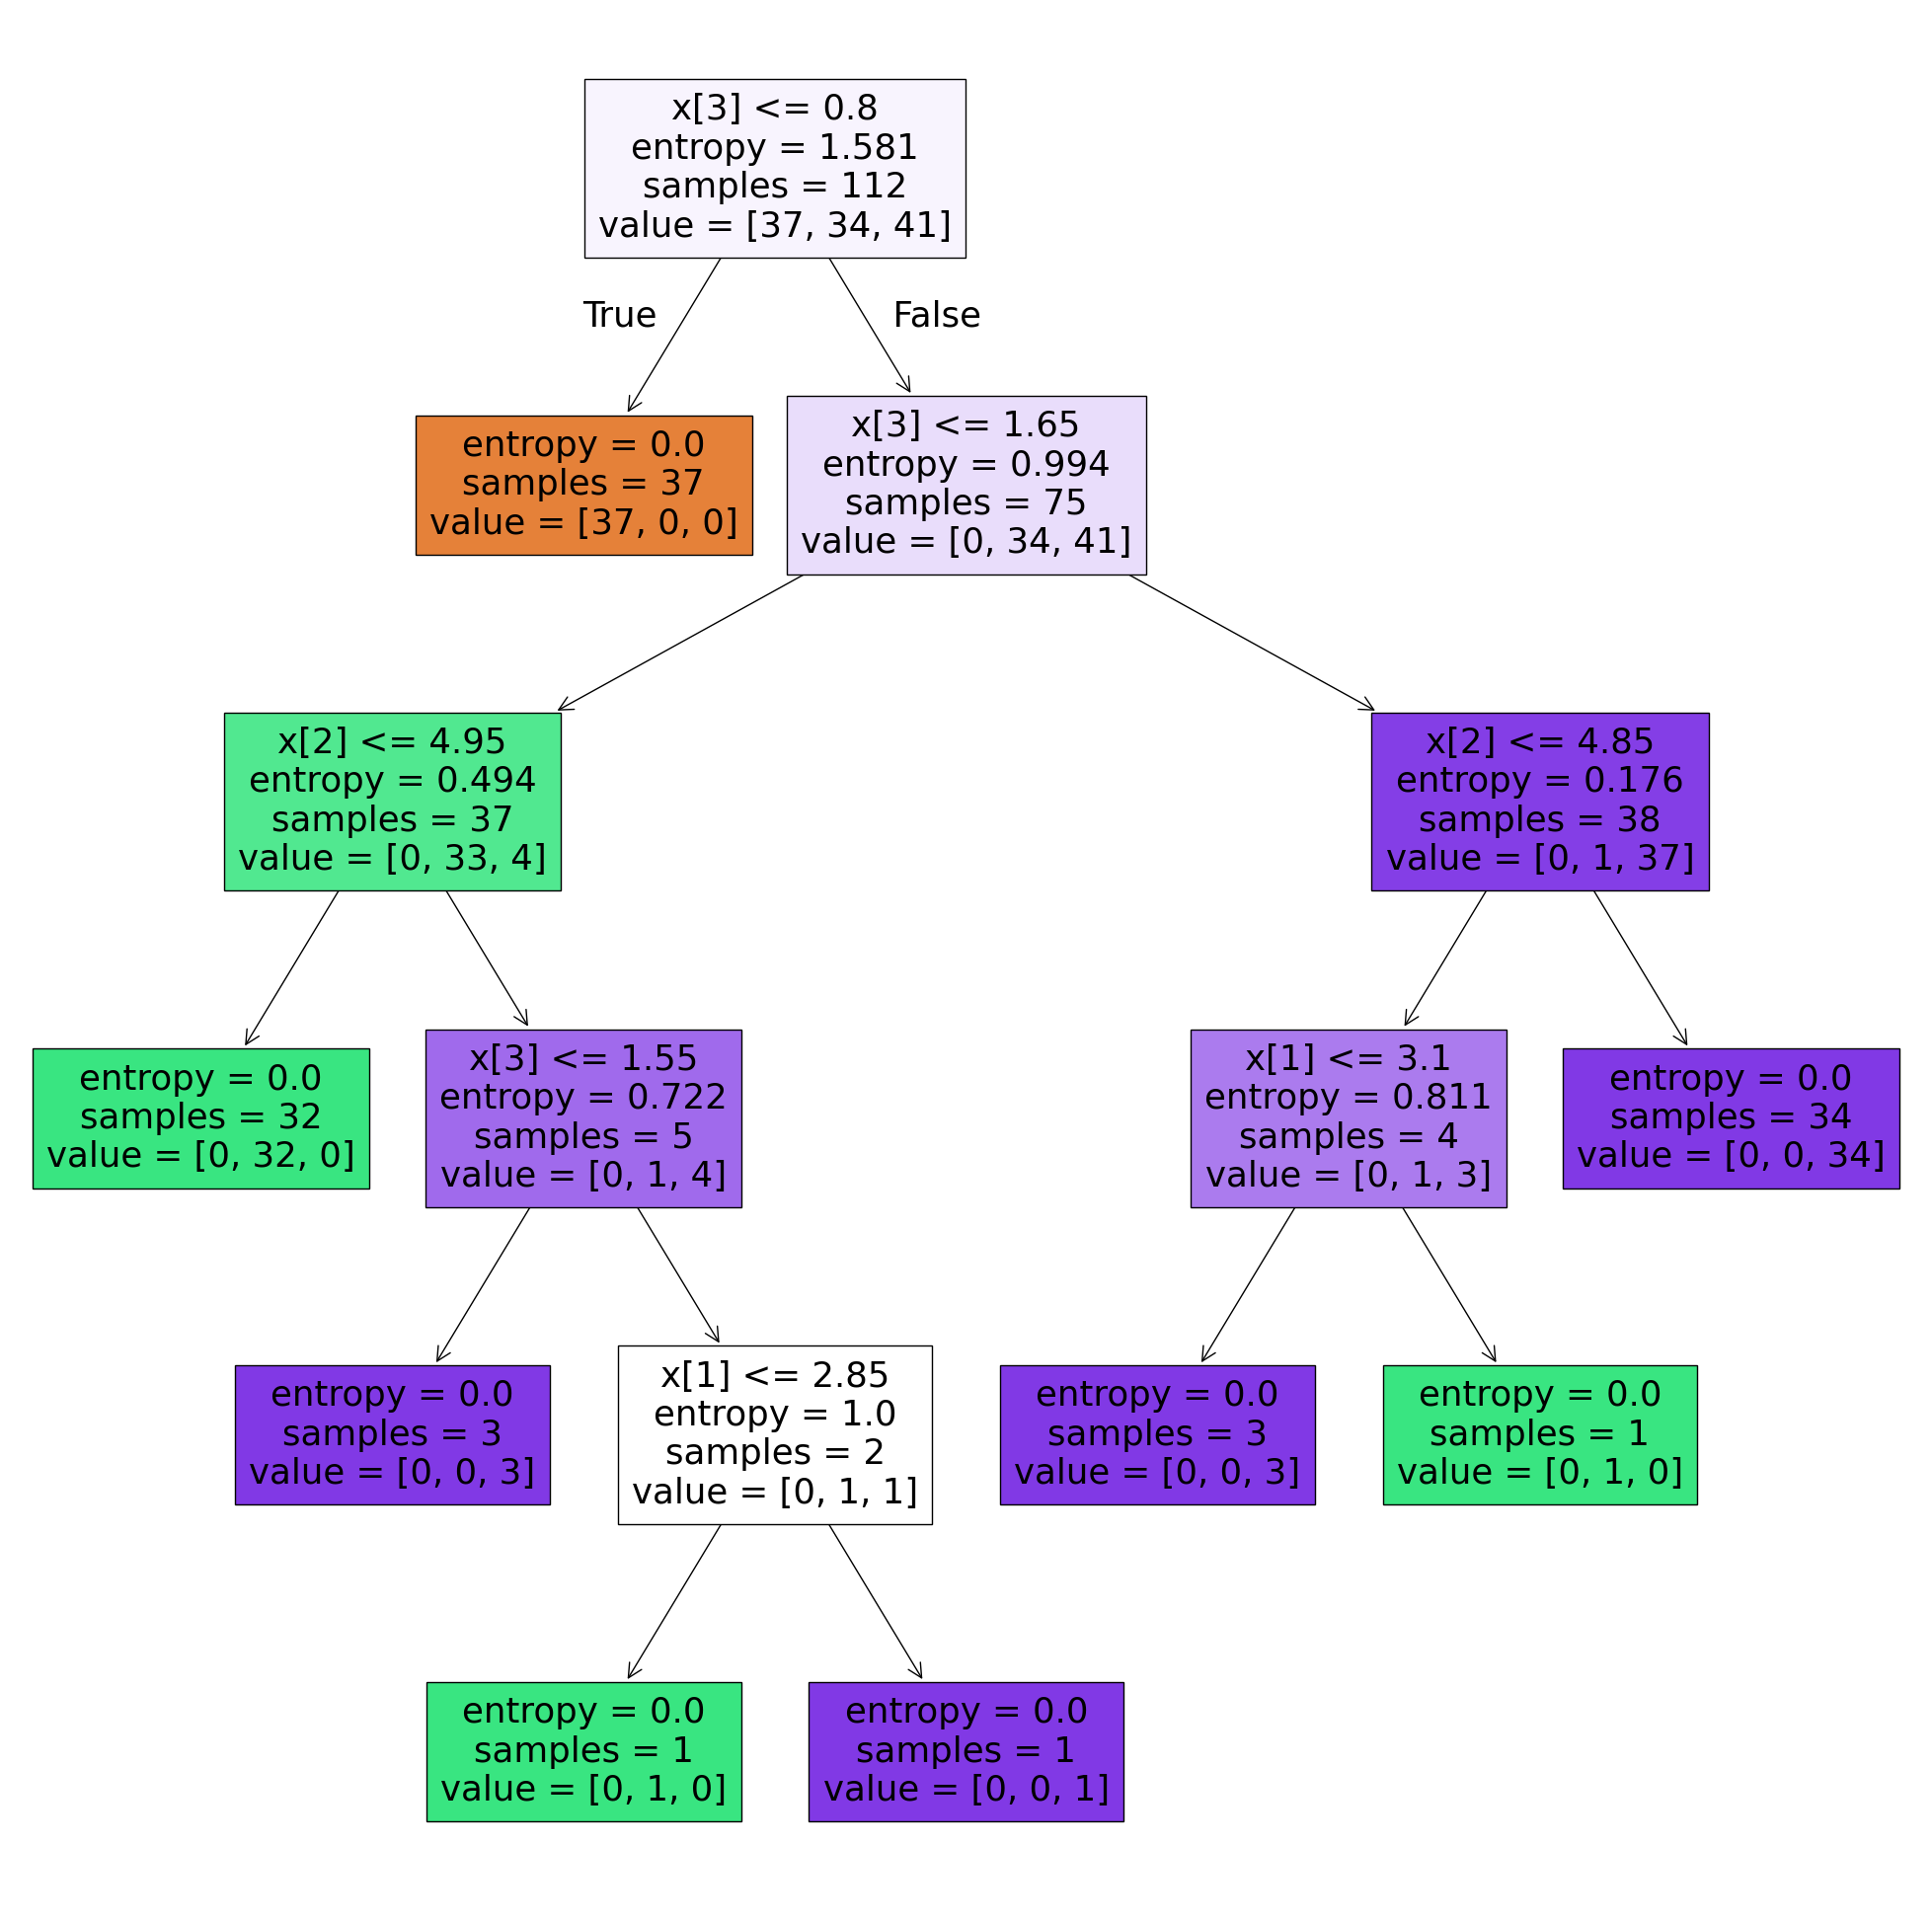

In [163]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(model_03,filled=True)
plt.show()

#  **4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)**

In [165]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [166]:
from sklearn.datasets import fetch_california_housing

house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [167]:
# Make the DataFrame 
data_04 = pd.DataFrame(house.data, columns = house.feature_names)
data_04['Price'] = house.target
# data_04.info()
data_04.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [168]:
# Create independet And Dependent Variable
X = data_04.drop('Price',axis = 1)
y = data_04['Price']

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 1)
print(f"X_train Shape : {X_train.shape} \nX_test Shape : {X_test.shape} \ny_train Shape : {y_train.shape} \ny_test Shape : {y_test.shape}")

X_train Shape : (15480, 8) 
X_test Shape : (5160, 8) 
y_train Shape : (15480,) 
y_test Shape : (5160,)


In [170]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale

StandardScaler()

In [171]:
# Scale the Independent Features 
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [172]:
# Make the Regression Model 
from sklearn.tree import DecisionTreeRegressor

model_04 = DecisionTreeRegressor()
model_04

DecisionTreeRegressor()

In [173]:
param ={
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [174]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
random_04 = RandomizedSearchCV(model_04,param_distributions=param,cv=5, verbose=3)
random_04

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [175]:
random_04.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.608 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.597 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.640 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.584 total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.670 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=20, min_samples_leaf=4, min_samples_split=2, splitter=best

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [176]:
# Geting Best Parameter 
random_04.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [177]:
final_best_model_04 = random_04.best_estimator_
final_best_model_04

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=4, min_samples_split=5)

In [178]:
y_pred = final_best_model_04.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Corrected import

mae = mean_absolute_error(y_test, y_pred)  # Assuming y_test is your test labels
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.42036776356589145
Mean Squared Error (MSE): 0.4153199994760755
Root Mean Squared Error (RMSE): 0.6444532562382438
R-squared (R2): 0.684421484029503


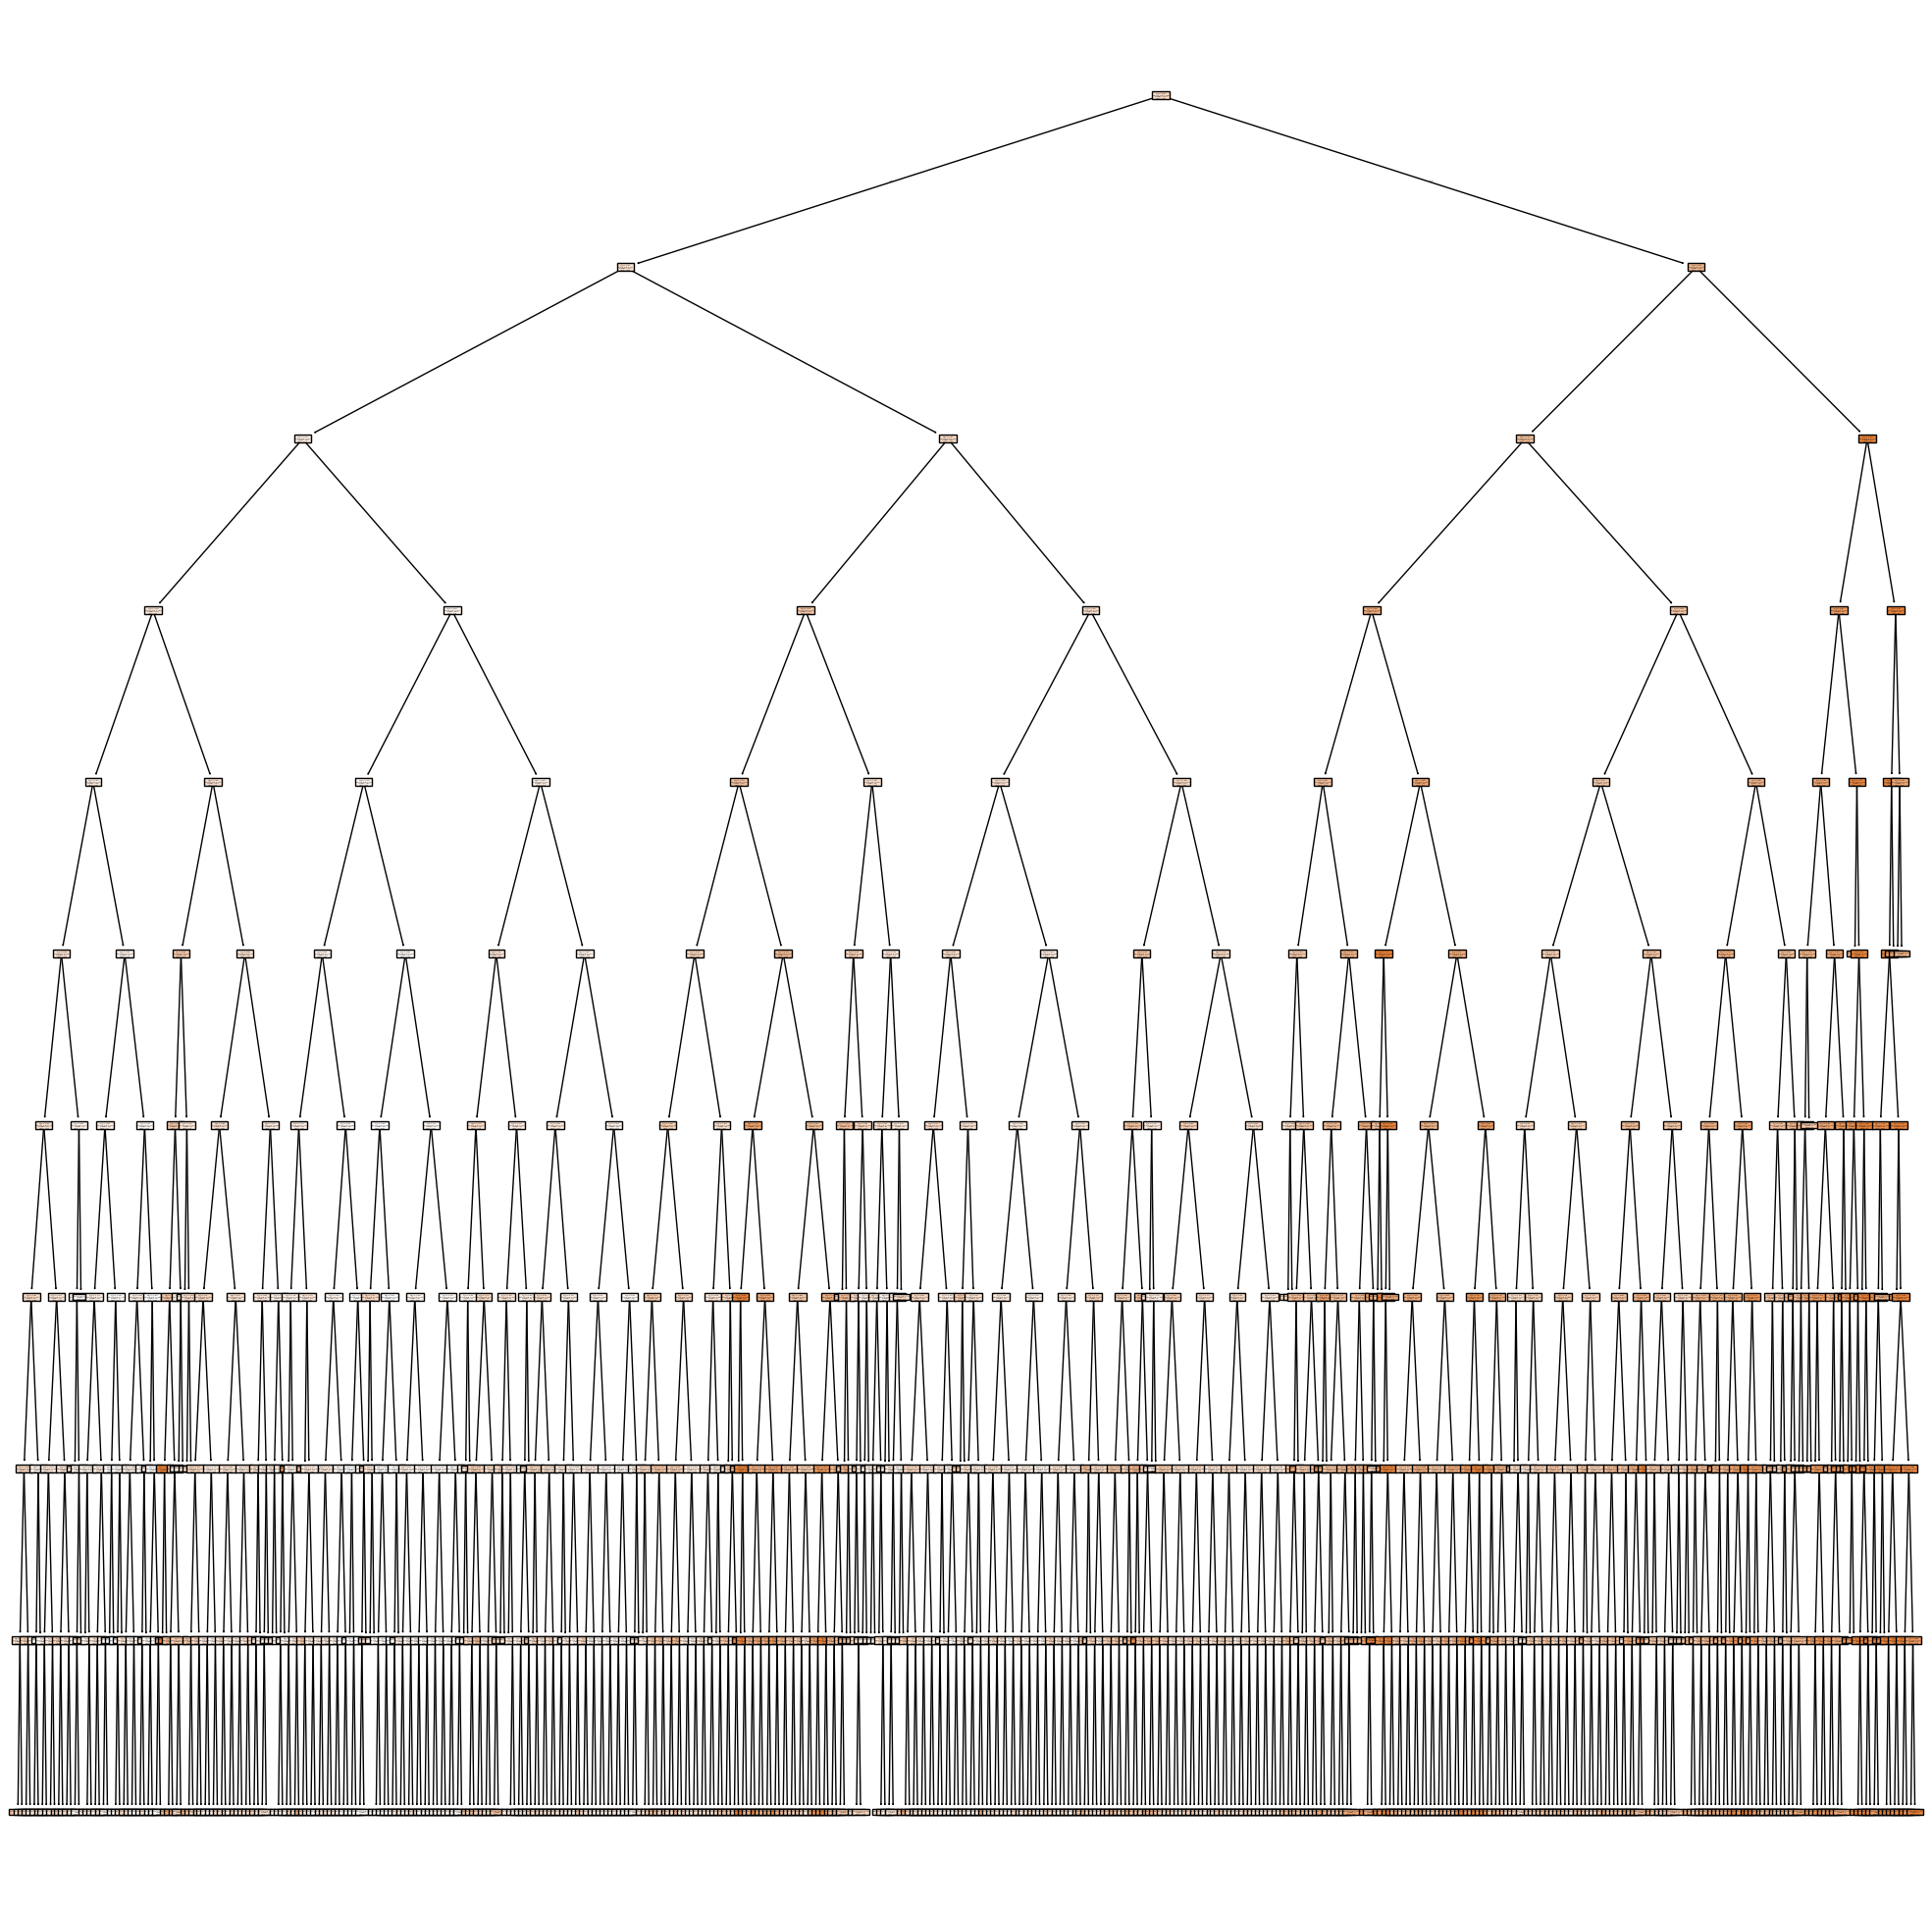

In [179]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(final_best_model_04,filled = True)
plt.show()

#  **5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz**

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd 
import seaborn as sns
import graphviz

In [2]:
iris = load_iris()
data_05 = pd.DataFrame(iris.data,columns = iris.feature_names)
data_05["Species"] = iris.target
data_05.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

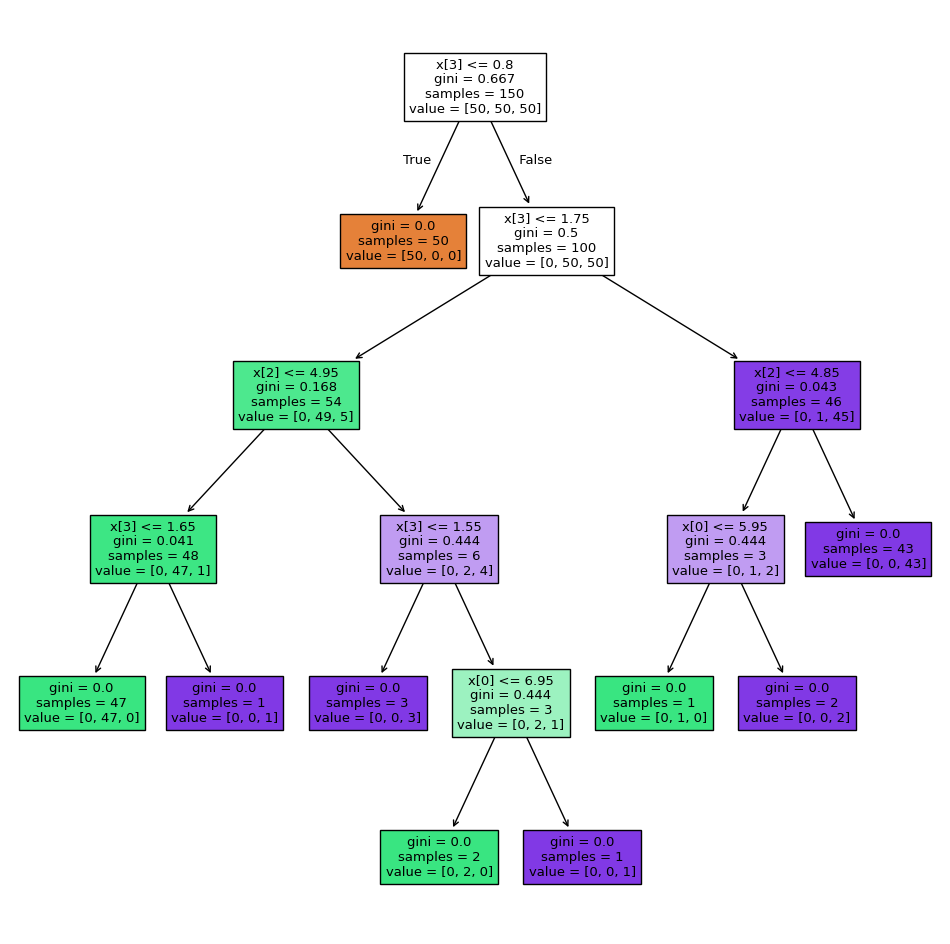

In [11]:
dot_data = tree.export_graphviz(clf,out_file=None, feature_names=iris.feature_names,
                                class_names = iris.target_names,filled=True)
graph = graphviz.Source(dot_data)
graph 

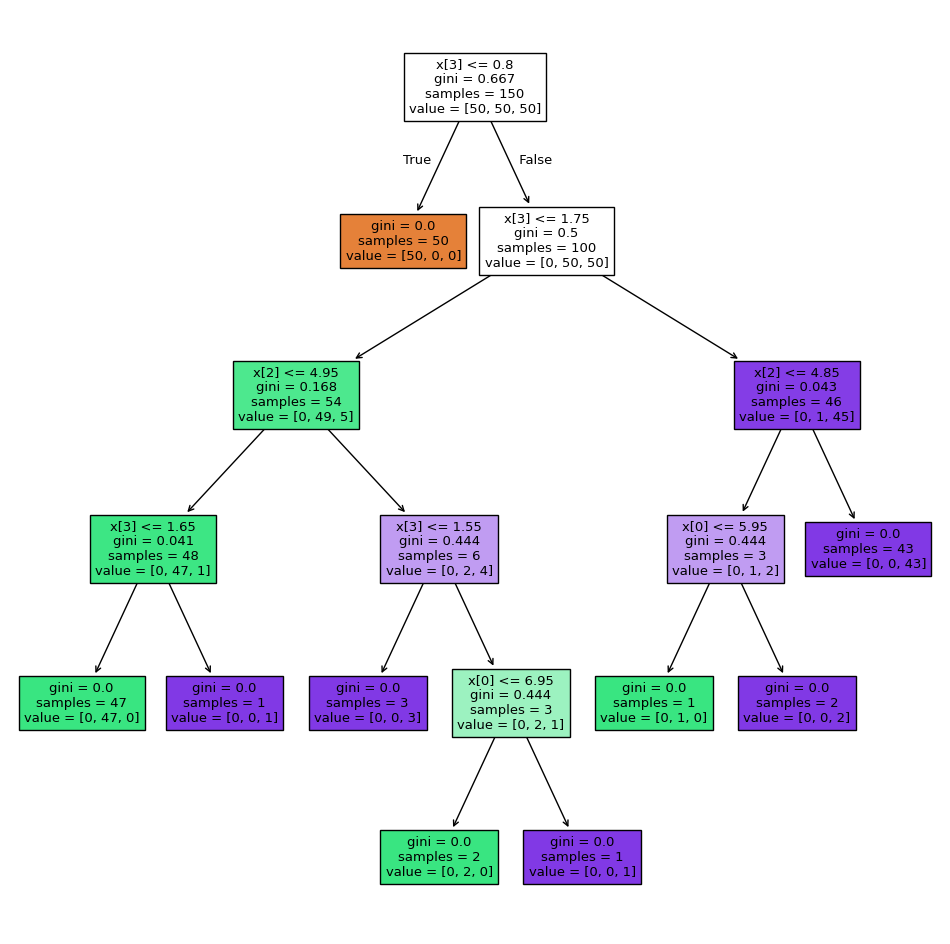

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(clf,filled=True)
plt.show()

#  **6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree**


In [27]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [37]:
placement_data  = pd.read_csv("C:/Users/PRAVIN/OneDrive/Desktop/Dataset/Placement Prediction Dataset\placementdata.csv")
placement_data.columns
placement_data.drop('StudentID',axis = 1,inplace = True)

In [3]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [39]:
# Perform Label Encoding 
placement_data['ExtracurricularActivities'] = placement_data['ExtracurricularActivities'].map({'No':0,'Yes':1})
placement_data['PlacementTraining'] = placement_data['PlacementTraining'].map({'No':0,'Yes':1})
placement_data['PlacementStatus'] = placement_data['PlacementStatus'].map({'NotPlaced':0,'Placed':1})

In [41]:
placement_data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


In [43]:
X = placement_data.drop('PlacementStatus',axis = 1)
y = placement_data['PlacementStatus']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_06_part01 = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, splitter= 'best')
model_06_part02 = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, splitter= 'best')
model_06_part01

DecisionTreeClassifier(max_depth=8)

In [49]:
# Train The Decision Tree Classifier Model
model_06_part01.fit(X_train,y_train)
model_06_part02.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_pred_part01 = model_06_part01.predict(X_test)
y_pred_part02 = model_06_part02.predict(X_test)

from sklearn.metrics import classification_report
print(f"Deapth Is 5\n\n")
print(classification_report(y_test, y_pred_part01),end="\n\n")
print(f"Deapth Is 3\n\n")
print(classification_report(y_test, y_pred_part02))

Deapth Is 5


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1467
           1       0.72      0.76      0.74      1033

    accuracy                           0.78      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.78      0.78      0.78      2500


Deapth Is 3


              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1467
           1       0.69      0.83      0.75      1033

    accuracy                           0.77      2500
   macro avg       0.77      0.78      0.77      2500
weighted avg       0.79      0.77      0.78      2500



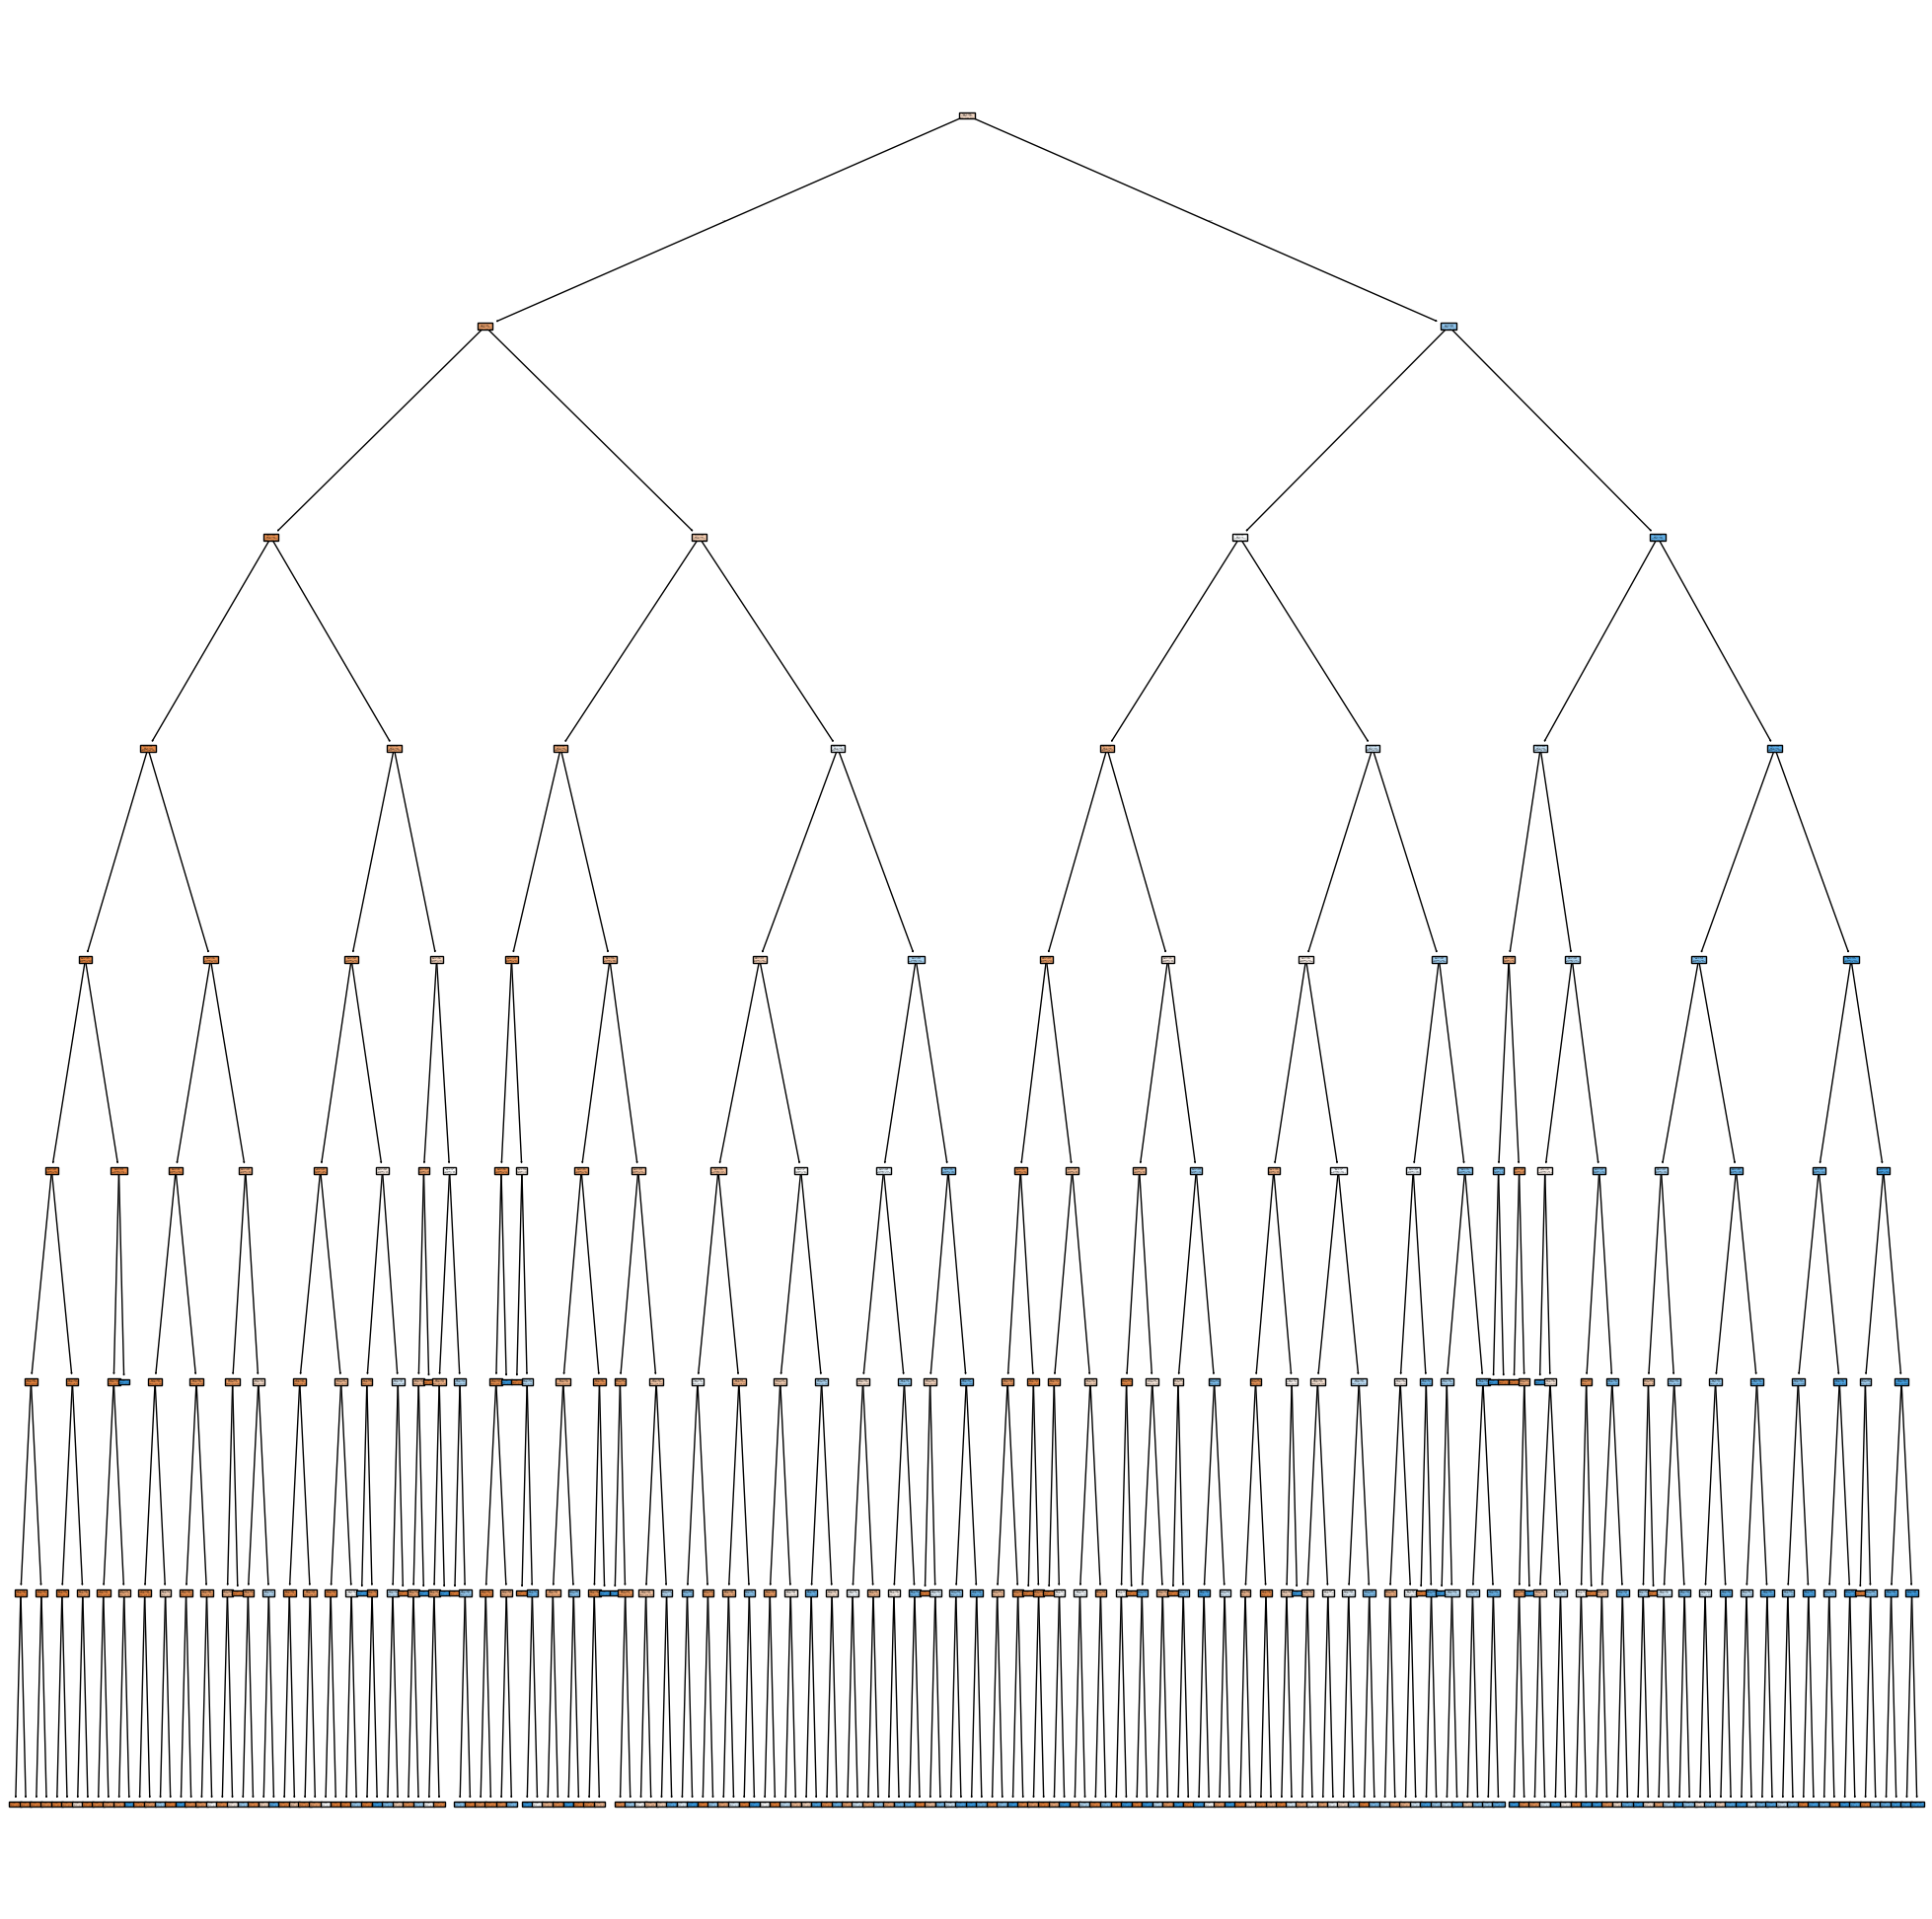

In [53]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(model_06_part01,filled=True)
plt.show()

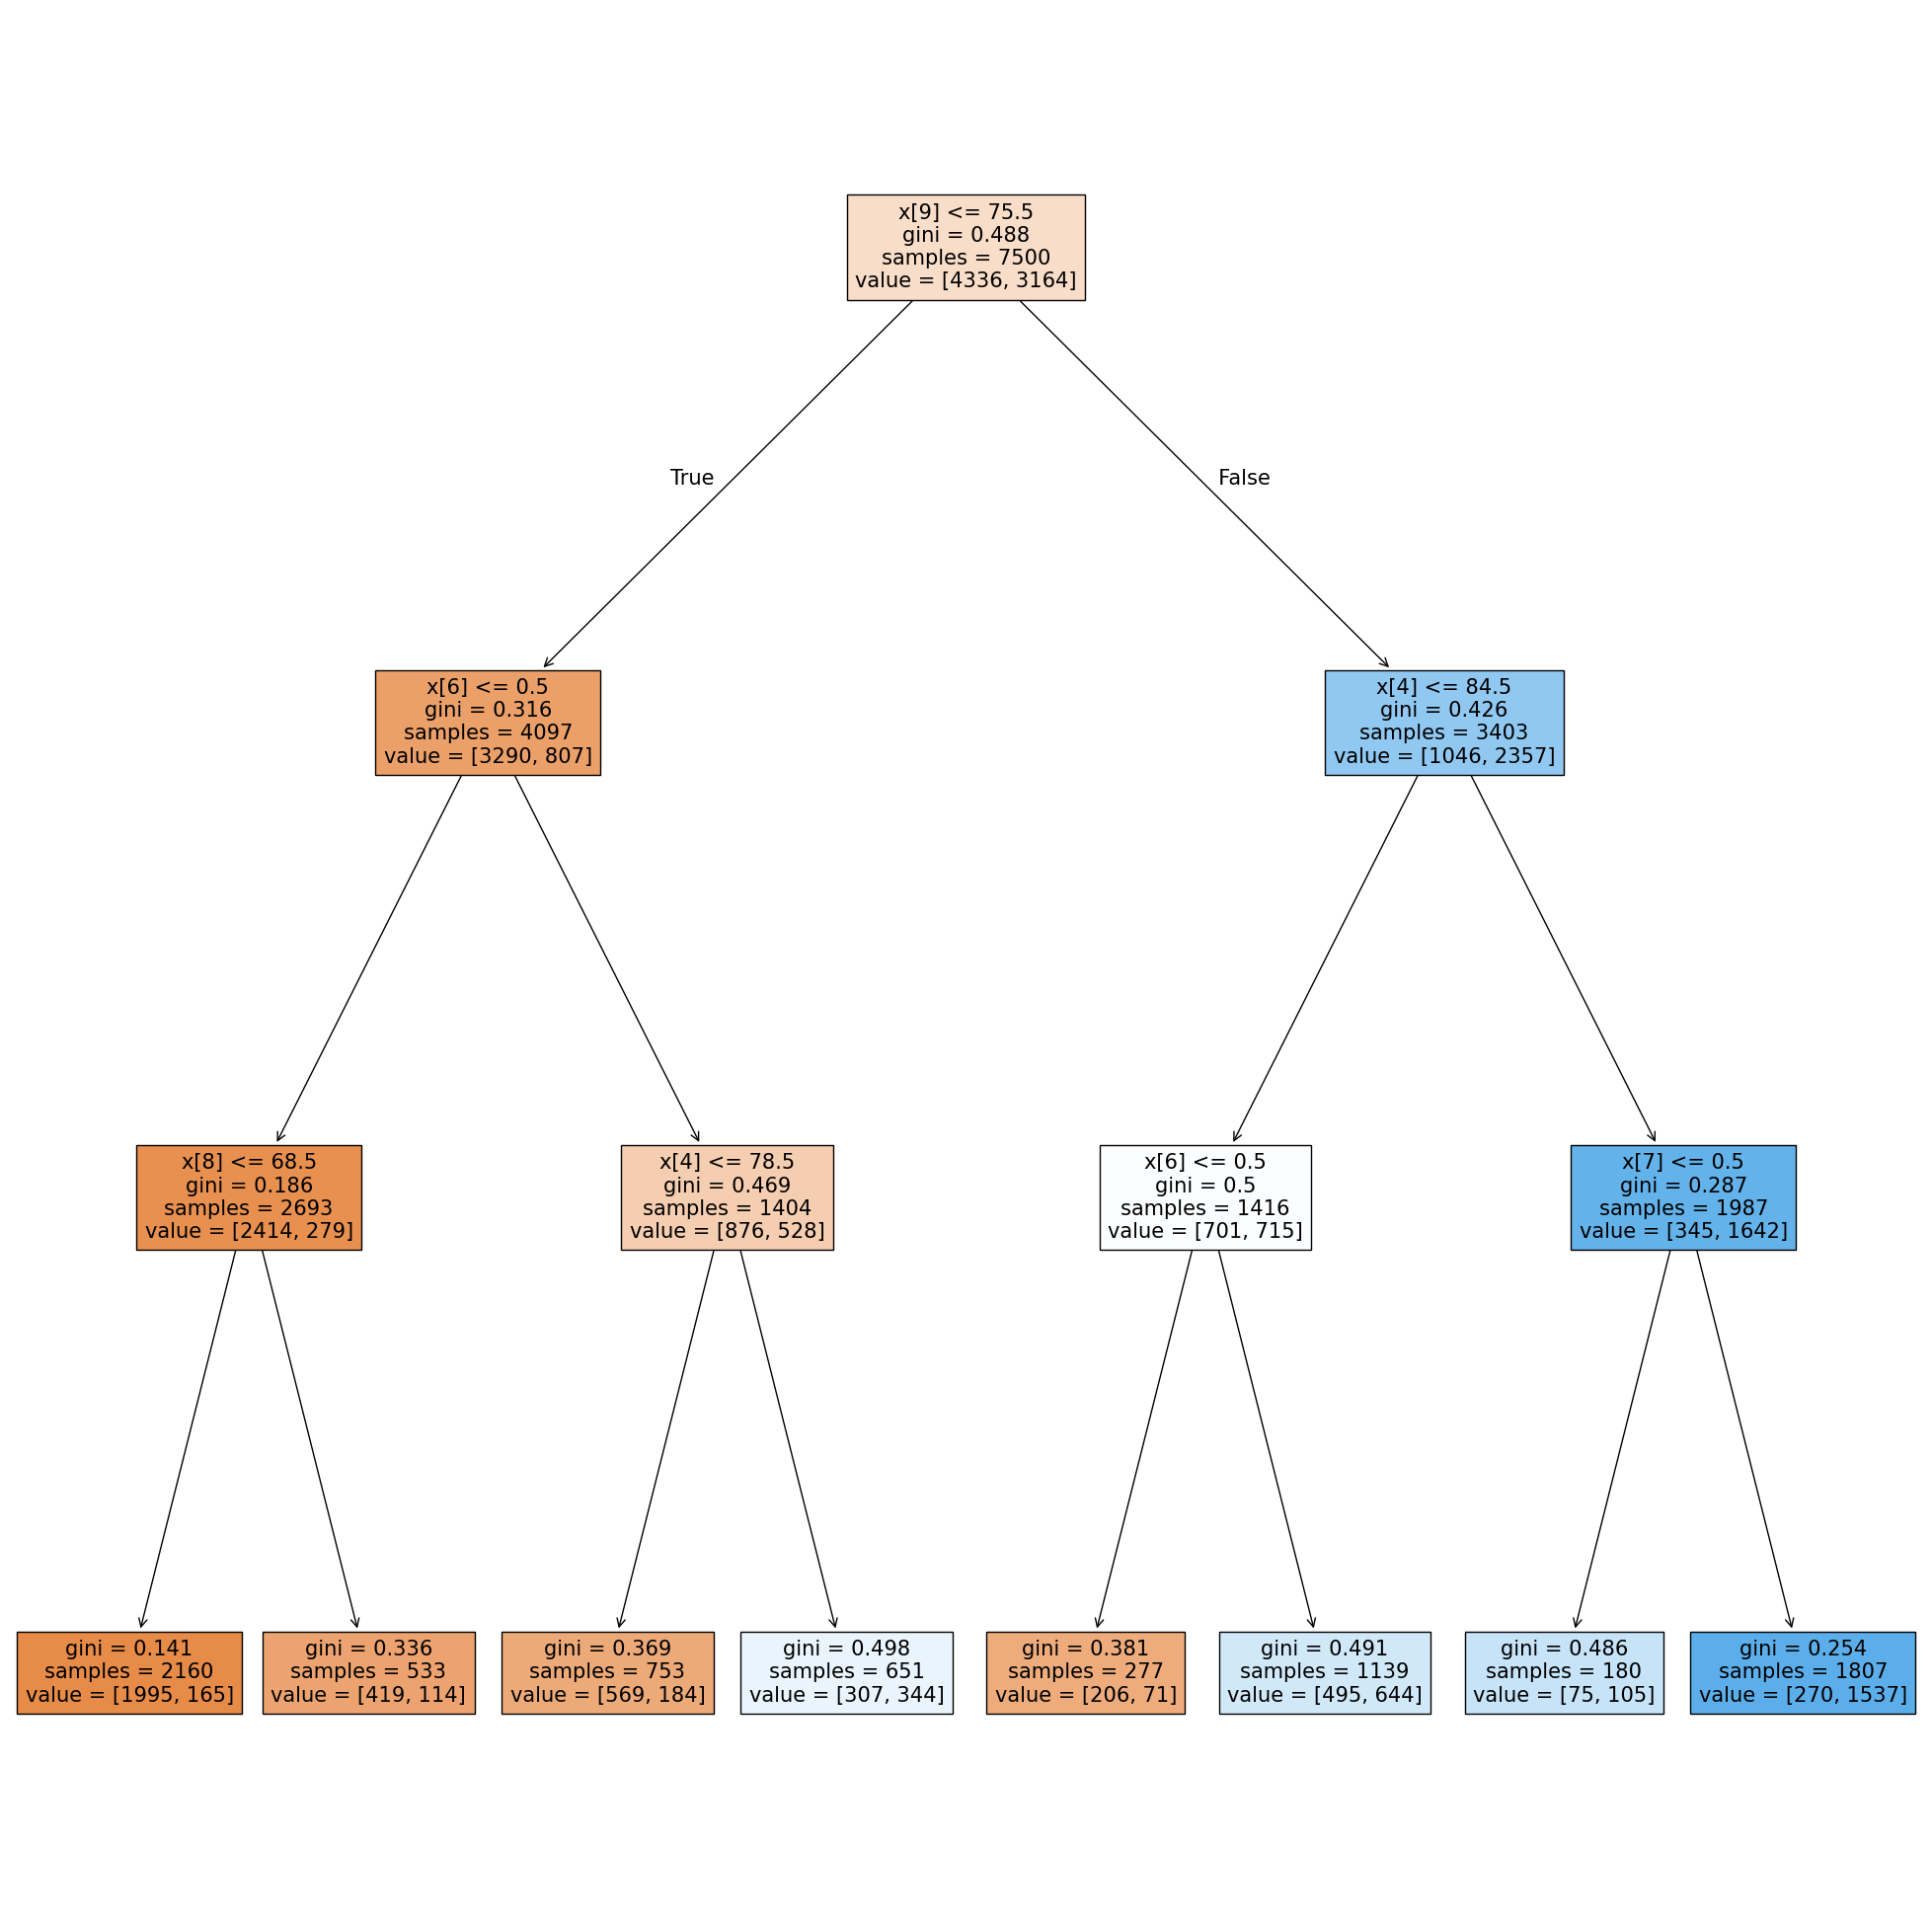

In [63]:
plt.figure(figsize=(25,25))
tree.plot_tree(model_06_part02,filled=True)
plt.show()

#  **7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree**

In [65]:
from sklearn.tree import DecisionTreeClassifier

model_07_part01 = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best', min_samples_split=5)
model_07_part02 = DecisionTreeClassifier()

In [67]:
# Train The Decision Tree Classifier Model
model_07_part01.fit(X_train,y_train)
model_07_part02.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred_part01 = model_07_part01.predict(X_test)
y_pred_part02 = model_07_part02.predict(X_test)

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred_part01),end="\n\n")
print(classification_report(y_test, y_pred_part02))

Deapth Is 5


              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1467
           1       0.72      0.78      0.75      1033

    accuracy                           0.79      2500
   macro avg       0.78      0.79      0.78      2500
weighted avg       0.79      0.79      0.79      2500


Deapth Is 3


              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1467
           1       0.65      0.67      0.66      1033

    accuracy                           0.72      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.72      0.72      0.72      2500



#  **8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data**

In [77]:
X.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88


In [79]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: PlacementStatus, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler 
# preprocessing 

StandardScaler()

In [93]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [97]:
from sklearn.tree import DecisionTreeClassifier
model_08_part_01 = DecisionTreeClassifier()
model_08_part_02 = DecisionTreeClassifier()
model_08_part_01

DecisionTreeClassifier()

In [99]:
model_08_part_01.fit(X_train,y_train)
model_08_part_02.fit(X_train_scale,y_train)

DecisionTreeClassifier()

In [103]:
y_pred_part01 = model_08_part_01.predict(X_test)
y_pred_part02 = model_08_part_02.predict(X_test_scale)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_part01),end="\n\n")
print(classification_report(y_test, y_pred_part02))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1467
           1       0.65      0.66      0.65      1033

    accuracy                           0.71      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.71      0.71      0.71      2500


              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1467
           1       0.65      0.67      0.66      1033

    accuracy                           0.72      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.72      0.72      0.72      2500



#  **9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification**

In [13]:
 import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Use One-vs-Rest (OvR) strategy
ovr_classifier = OneVsRestClassifier(dt_classifier)

# Train the classifier
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


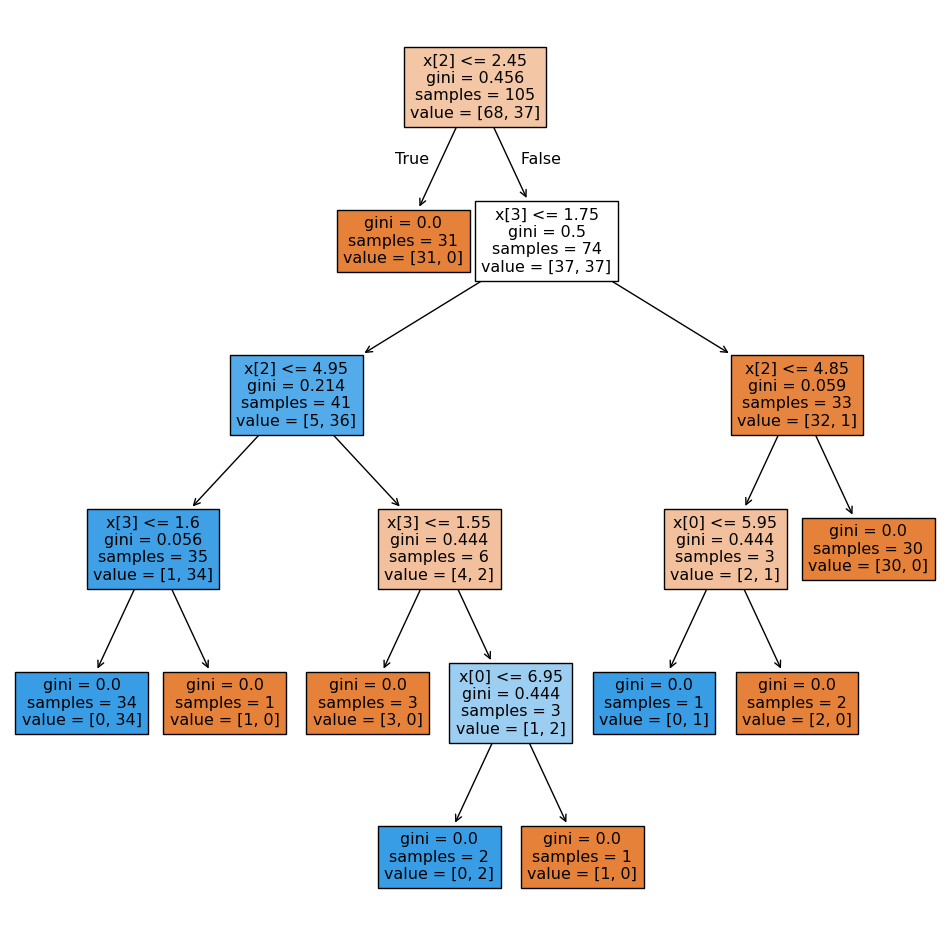

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create figure with specified size
plt.figure(figsize=(12,12))

tree.plot_tree(ovr_classifier.estimators_[1], filled=True)
plt.show()

#  **10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores**

sepal length (cm): 0.038220038220038215
sepal width (cm): 0.0
petal length (cm): 0.06846677356655183
petal width (cm): 0.89331318821341


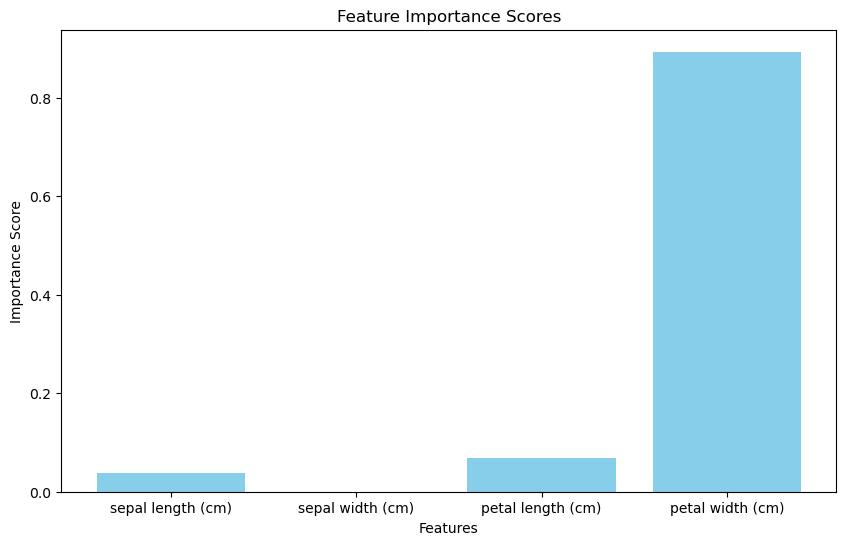

In [47]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = dt_classifier.feature_importances_

# Display feature importance scores
for i, feature_name in enumerate(iris.feature_names):
    print(f"{feature_name}: {feature_importances[i]}")

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(iris.feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()



#  **11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree**


Mean Squared Error (max_depth=5): 0.028833875470807763
Mean Squared Error (unrestricted): 0.023420744190769886


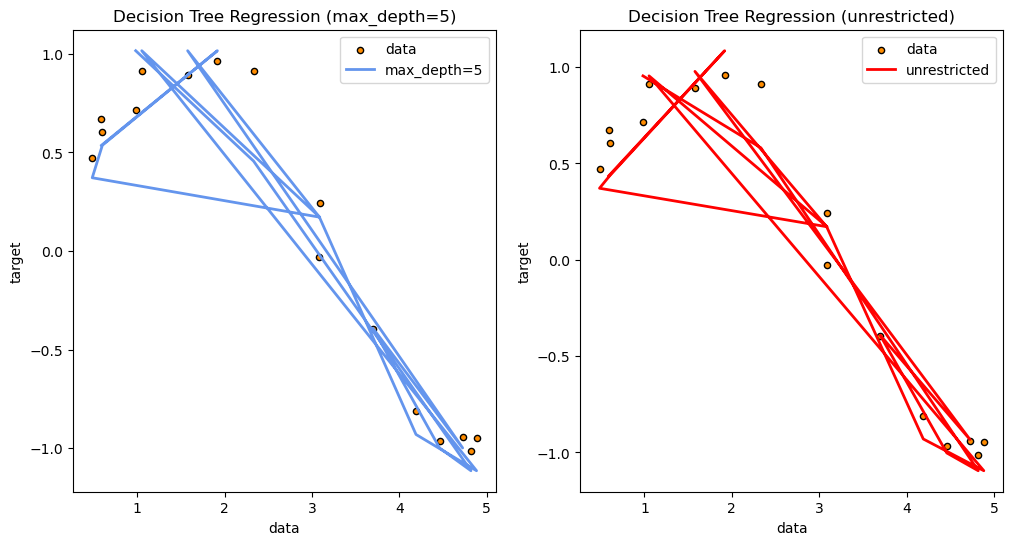

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a Decision Tree Regressor with max_depth=5
regressor_depth5 = DecisionTreeRegressor(max_depth=5, random_state=0)
regressor_depth5.fit(X_train, y_train)
y_pred_depth5 = regressor_depth5.predict(X_test)
mse_depth5 = mean_squared_error(y_test, y_pred_depth5)

# Train an unrestricted Decision Tree Regressor
regressor_unrestricted = DecisionTreeRegressor(random_state=0)
regressor_unrestricted.fit(X_train, y_train)
y_pred_unrestricted = regressor_unrestricted.predict(X_test)
mse_unrestricted = mean_squared_error(y_test, y_pred_unrestricted)

# Print the Mean Squared Errors
print(f"Mean Squared Error (max_depth=5): {mse_depth5}")
print(f"Mean Squared Error (unrestricted): {mse_unrestricted}")

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_depth5, color="cornflowerblue", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression (max_depth=5)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_unrestricted, color="red", label="unrestricted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression (unrestricted)")
plt.legend()

plt.show() 

#  **12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy**

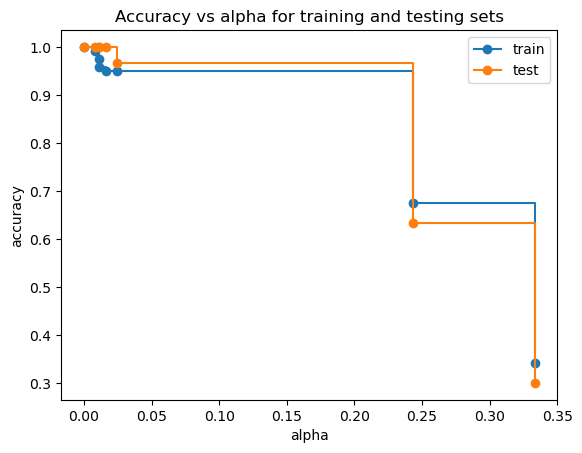

Best ccp_alpha: 0.0
Accuracy with best ccp_alpha: 1.0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train and evaluate classifiers for different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate training and testing accuracies
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Visualize the effect of ccp_alpha on accuracy
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Find the best ccp_alpha based on test accuracy
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best ccp_alpha: {best_alpha}")

# Train the final classifier with the best ccp_alpha
best_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best ccp_alpha: {accuracy}")
 

#  **13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,  Recall, and F1-Score**

In [79]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


#  **14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn**

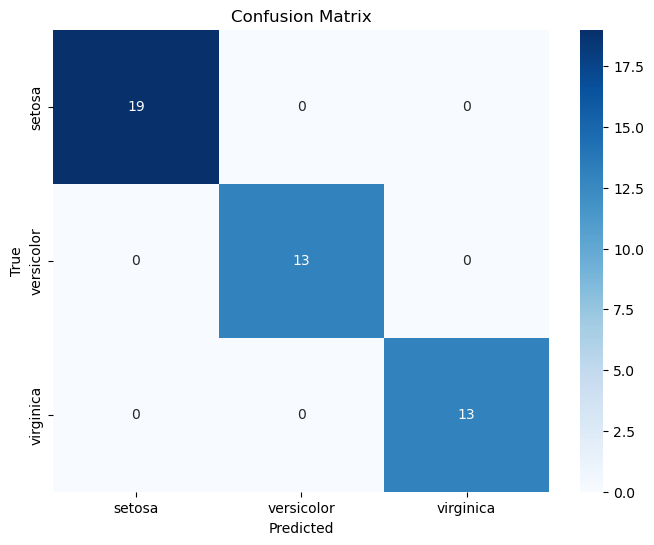

In [84]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#  **15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split**

In [89]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11)
}

# Use GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {best_params}")

# Evaluate the best estimator on the test set
accuracy = best_estimator.score(X_test, y_test)
print(f"Accuracy with the best parameters: {accuracy:.2f}")


Best parameters found: {'max_depth': 4, 'min_samples_split': 6}
Accuracy with the best parameters: 1.00
